# Import libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style('darkgrid')

import os
from pathlib import Path

import pickle

from src.scenario import SimulationScenario
scenario = SimulationScenario(None, None, None)

# Load P-control datasets

In [2]:
# GET PATHS
root_path_P = './data/P_controller'

all_seeds_P = list(range(1, 6))
all_seeds_P = list(map(str, all_seeds_P))
print(all_seeds_P)

pathes_P = {}

for path in Path(root_path_P).iterdir():
    seed = str(path).split('seed_')[-1]
    if seed in all_seeds_P:
        pathes_P[seed] = path
display(pathes_P)

# LOAD IN ONE DATASET
total_costs_P = []

for seed in pathes_P:
    seed_obs_df = pd.read_csv(
        pathes_P[seed] / "clean_observations.csv", 
        index_col=0,
    )
    seed_obs_df.rename({'0': seed}, axis=1, inplace=True)
    seed_act_df = pd.read_csv(
        pathes_P[seed] / "actions.csv", 
        index_col=0,
    )
    seed_act_df.rename({'0': seed}, axis=1, inplace=True)
    
    seed_total_cost = scenario.compute_total_objective(
        seed_obs_df.values, 
        actions=seed_act_df.values,
    )
    total_costs_P.append(seed_total_cost)

total_costs_P = np.array(total_costs_P)
central_P = total_costs_P.mean()
stds = total_costs_P.std()
bottom_P = central_P - stds
top_P = central_P + stds

print(f'bottom_P = {bottom_P:.3f}')
print(f'central_P = {central_P:.3f}')
print(f'top_P = {top_P:.3f}')

['1', '2', '3', '4', '5']


{'3': PosixPath('data/P_controller/2024-03-27_122643_seed_3'),
 '4': PosixPath('data/P_controller/2024-03-27_122643_seed_4'),
 '5': PosixPath('data/P_controller/2024-03-27_122643_seed_5'),
 '2': PosixPath('data/P_controller/2024-03-27_122643_seed_2'),
 '1': PosixPath('data/P_controller/2024-03-27_122643_seed_1')}

bottom_P = 2.203
central_P = 2.463
top_P = 2.722


# Load RL-datasets

In [3]:
# GET PATHS
root_path = './data'

all_seeds = list(range(1, 15))
all_seeds = list(map(str, all_seeds))
print(all_seeds)

pathes = {}

for path in Path(root_path).iterdir():
    seed = str(path).split('seed_')[-1]
    if seed in all_seeds:
        pathes[seed] = path
display(pathes)


# LOAD IN ONE DATASET
learning_curves = []

for seed in pathes:
    seed_df = pd.read_csv(
        pathes[seed] / "learning curve.csv", 
        index_col=0,
    )
    seed_df.rename({'0': seed}, axis=1, inplace=True)
    learning_curves.append(seed_df)
    
learning_curves = pd.concat(learning_curves, axis=1)
learning_curves = learning_curves[all_seeds] # Sort columns
learning_curves.describe()

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']


{'8': PosixPath('data/2024-03-26_221635_seed_8'),
 '12': PosixPath('data/2024-03-26_221635_seed_12'),
 '7': PosixPath('data/2024-03-26_103819_seed_7'),
 '2': PosixPath('data/2024-03-26_103818_seed_2'),
 '9': PosixPath('data/2024-03-26_221635_seed_9'),
 '3': PosixPath('data/2024-03-26_103818_seed_3'),
 '6': PosixPath('data/2024-03-26_103819_seed_6'),
 '14': PosixPath('data/2024-03-26_221635_seed_14'),
 '13': PosixPath('data/2024-03-26_221635_seed_13'),
 '4': PosixPath('data/2024-03-26_103819_seed_4'),
 '11': PosixPath('data/2024-03-26_221635_seed_11'),
 '1': PosixPath('data/2024-03-26_103818_seed_1'),
 '10': PosixPath('data/2024-03-26_221635_seed_10'),
 '5': PosixPath('data/2024-03-26_103819_seed_5')}

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,204.000000,211.000000,175.000000,145.000000,178.000000,189.000000,165.000000
mean,3.509594,2.539125,3.242997,2.590975,2.992448,3.366597,2.526493,3.391562,3.050775,2.696433,2.917647,3.158664,2.949377,2.788670
std,2.815633,0.597689,1.464547,0.534131,0.839903,0.089173,0.517598,0.220143,0.683475,0.674073,0.501929,0.919186,0.671707,0.506246
min,2.029746,1.978085,1.947065,1.971402,1.944724,3.277720,1.981067,3.266646,1.932075,2.067171,2.081743,1.946155,2.040625,2.004178
25%,2.675513,2.061144,2.061144,2.151025,2.507207,3.318071,2.097617,3.308599,2.575255,2.207028,2.566500,2.647837,2.134256,2.290277
50%,3.046134,2.182604,2.770871,2.333226,2.826242,3.335576,2.270462,3.328028,3.229544,2.479056,2.898322,2.965824,3.183905,2.847305
75%,3.340841,3.155271,3.415613,3.171213,3.121285,3.364743,2.999093,3.386039,3.407064,2.937508,3.214923,3.257585,3.494659,3.089815
max,21.468832,4.741112,7.785267,3.769596,6.068163,3.722469,3.973656,5.476902,5.646765,5.416898,4.086982,8.236204,4.327940,3.996705


Let us drop "not-working" seeds

,2,4,7,11,14
count,300.000000,300.000000,300.000000,145.000000,165.000000
mean,2.539125,2.590975,2.526493,2.917647,2.788670
std,0.597689,0.534131,0.517598,0.501929,0.506246
min,1.978085,1.971402,1.981067,2.081743,2.004178
25%,2.061144,2.151025,2.097617,2.566500,2.290277
50%,2.182604,2.333226,2.270462,2.898322,2.847305
75%,3.155271,3.171213,2.999093,3.214923,3.089815
max,4.741112,3.769596,3.973656,4.086982,3.996705


Number of learning curves: 5


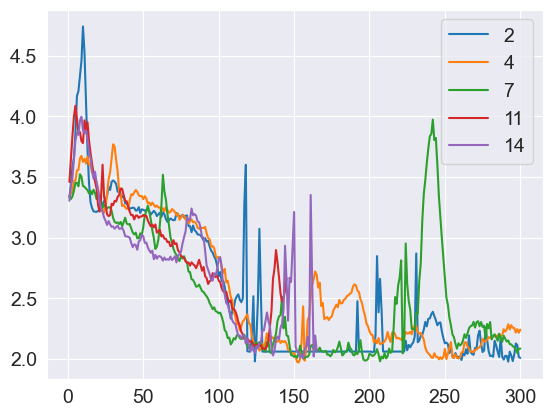

In [4]:
# seeds_to_drop = ['1', '3', '5', '6', '8', '9', '12']
# seeds_to_drop = ['1', '3', '5', '6', '9', '12', '13']
seeds_to_drop = ['1', '3', '5', '6', '8', '9', '10', '12', '13']
learning_curves_selected = learning_curves.drop(seeds_to_drop, axis=1)
display(learning_curves_selected.describe())
learning_curves_selected.plot()
print(f'Number of learning curves: {learning_curves_selected.shape[1]}')

In [5]:
# sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "mathptmx",
    "font.size": 14,
    "xtick.bottom" : True, 
    "ytick.left" : True,
    'xtick.major.size': 8,
    'xtick.major.width': 1.5,
    'xtick.minor.size': 4,
    'xtick.minor.width': 0.75,
    'ytick.major.size': 8,
    'ytick.major.width': 1.5,
    'ytick.minor.size': 4,
    'ytick.minor.width': 0.75,
})


def plot_total_cost(df, plot_type='means', savefig=False):
    if plot_type == 'means':
        central = df.mean(axis=1)
        stds = df.std(axis=1)
        bottom = central - stds
        top = central + stds
    elif plot_type == 'medians':
        central = df.median(axis=1)
        bottom = df.quantile(0.25, axis=1)
        top = df.quantile(0.75, axis=1)
    print(plot_type)
    
    fig, ax = plt.subplots(1, 1, figsize=(4,2.5))
    ax.set_ylabel("Total cost")
    ax.set_xlabel("Iteration number $(i)$")
    ax.xaxis.set_minor_locator(MultipleLocator(10))
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
    
    plt.axhline(central_P, linestyle='--', color='r', label='Benchmark')
    plt.axhspan(bottom_P, top_P, alpha=0.1, color='r')
    
    central.plot(label='Our controller')
    plt.fill_between(central.index, bottom, top, alpha=0.3)
    
    plt.legend()
    
    plt.tight_layout(pad=0.2)
    if savefig:
        plt.savefig("learning_curve.pdf", dpi=400)
    plt.show();

# plot_total_cost(learning_curves_selected.iloc[:200], savefig=True)

In [6]:
learning_curves_selected.mean(axis=1).iloc[123]

2.0732179720806982

# Plot actions and observations

In [7]:
# GET PATHS
root_path = './data'

all_seeds = list(range(1, 15))
all_seeds = list(map(str, all_seeds))
print(all_seeds)

pathes = {}

for path in Path(root_path).iterdir():
    seed = str(path).split('seed_')[-1]
    if seed in all_seeds:
        pathes[seed] = path
display(pathes)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']


{'8': PosixPath('data/2024-03-26_221635_seed_8'),
 '12': PosixPath('data/2024-03-26_221635_seed_12'),
 '7': PosixPath('data/2024-03-26_103819_seed_7'),
 '2': PosixPath('data/2024-03-26_103818_seed_2'),
 '9': PosixPath('data/2024-03-26_221635_seed_9'),
 '3': PosixPath('data/2024-03-26_103818_seed_3'),
 '6': PosixPath('data/2024-03-26_103819_seed_6'),
 '14': PosixPath('data/2024-03-26_221635_seed_14'),
 '13': PosixPath('data/2024-03-26_221635_seed_13'),
 '4': PosixPath('data/2024-03-26_103819_seed_4'),
 '11': PosixPath('data/2024-03-26_221635_seed_11'),
 '1': PosixPath('data/2024-03-26_103818_seed_1'),
 '10': PosixPath('data/2024-03-26_221635_seed_10'),
 '5': PosixPath('data/2024-03-26_103819_seed_5')}

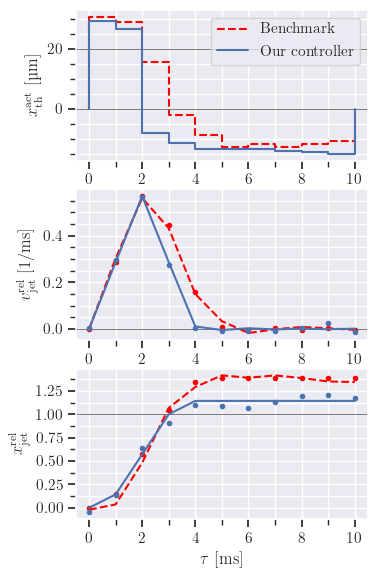

In [8]:
sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "mathptmx",
    "font.size": 14,
})

seeds_colors = {
    '2': 'b',
    # '4': 'g',
    # '5': 'b',
    # '7': 'c',
    # '14': 'orange',
}

P_seeds_colors = {
    '2': 'r',
}

# def plot_iteration_results()
# LOAD IN ONE DATASET
iteration = 200

seed_observations = {}
seed_clean_observations = {}
seed_actions = {}


P_clean_obs_df = pd.read_csv(
    pathes_P['2'] / "clean_observations.csv", 
    index_col=0,
)

P_obs_df = pd.read_csv(
    pathes_P['2'] / "observations.csv", 
    index_col=0,
)

P_act_df = pd.read_csv(
    pathes_P['2'] / "actions.csv", 
    index_col=0,
)


for seed in seeds_colors:
    with open(pathes[seed] / "iteration_data.pkl", 'rb') as f:
        data = pickle.load(f)
    
    load_iteration = iteration
    if iteration > len(data):
        load_iteration = len(data)
    
    seed_clean_observations[seed] = data[load_iteration - 1]['clean_observations']
    seed_observations[seed] = data[load_iteration - 1]['observations']
    seed_actions[seed] = [0.]
    seed_actions[seed].extend(data[load_iteration - 1]['actions'][:-1])

fig, axes = plt.subplots(3, 1, figsize=(4,6),) # gridspec_kw={'height_ratios': [0.8, 1, 1, 1]})
    
# PLOT ACTIONS
ax = axes[0]

ax.axhline(0, color='black', linewidth=0.5, alpha=0.75)
ax.axhline(20, color='black', linewidth=0.5, alpha=0.75)

P_act_df.plot('step', 'action', color='red', linestyle='--', ax=ax, label='Benchmark')
i = 1
for seed in seeds_colors:
    real_actions = scenario.get_real_actions(seed_actions[seed])
    ax.plot(real_actions[:,0], real_actions[:,1], label='Our controller', color=seeds_colors[seed]) # f'our controller: seed {i}'
    i += 1
    

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.xaxis.grid(True, which='minor')
ax.yaxis.grid(True, which='minor')
    
ax.set_ylabel(r"$x^\mathrm{act}_\mathrm{th}$ [µm]")
ax.set_xlabel("")

ax.legend(loc='upper right')

# PLOT JET VELOCITIES
ax = axes[1]

ax.axhline(0, color='black', linewidth=0.5, alpha=0.75)


P_obs_df.iloc[:,1].plot(color='red', linestyle='--', ax=ax)
P_clean_obs_df.iloc[:,1].plot(marker='.', color='red', linestyle='', ax=ax)

for seed in seeds_colors:
    ax.plot(seed_clean_observations[seed][:,1], color=seeds_colors[seed])
    ax.plot(seed_observations[seed][:,1], linestyle='', marker='.', color=seeds_colors[seed])
    
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.xaxis.grid(True, which='minor')
ax.yaxis.grid(True, which='minor')
    
ax.set_ylabel(r"$v^\mathrm{rel}_\mathrm{jet}~[1/\mathrm{ms}]$")
ax.set_xlabel("")
    
    # ax.legend().set_visible(False)

# PLOT JET LENGTHS
ax = axes[2]

ax.axhline(1.0, color='black', linewidth=0.5, alpha=0.75)

P_obs_df.iloc[:,0].plot(color='red', linestyle='--', ax=ax)
P_clean_obs_df.iloc[:,0].plot(marker='.', color='red', linestyle='', ax=ax)

for seed in seeds_colors:
    ax.plot(seed_clean_observations[seed][:,0], label=seed, color=seeds_colors[seed])
    ax.plot(seed_observations[seed][:,0], linestyle='', marker='.', color=seeds_colors[seed])

# for iter, ax in zip(iterations_lt, axes[2,:].flat):
    
#     ax.axhline(0, color='black', linewidth=0.5, alpha=0.75)
    
#     sns.lineplot(df, x='time', y=f'jet_velocity_{iter}', color='purple', ax=ax)
    
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(0.25))
ax.yaxis.set_minor_locator(MultipleLocator(0.125))
ax.xaxis.grid(True, which='minor')
ax.yaxis.grid(True, which='minor')
    
ax.set_ylabel(r"$x^\mathrm{rel}_\mathrm{jet}$")
ax.set_xlabel(r"$\tau$ [ms]")

plt.tight_layout(h_pad=0.1)
# plt.savefig("simulation_results.pdf", dpi=400)

In [17]:
print(f'Achieved relative jet length: {seed_clean_observations[seed][:,0][-1]:.3f}')
print(f'Benchmark relative jet length: {P_clean_obs_df.iloc[-1, 0]:.3f}')

Achieved relative jet length: 1.144
Benchmark relative jet length: 1.389


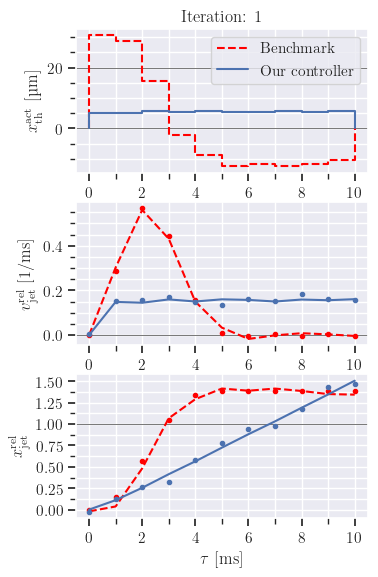

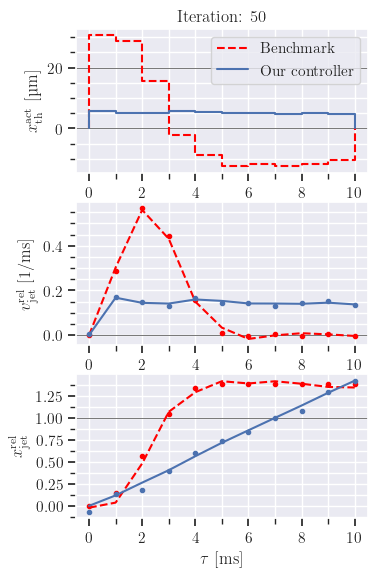

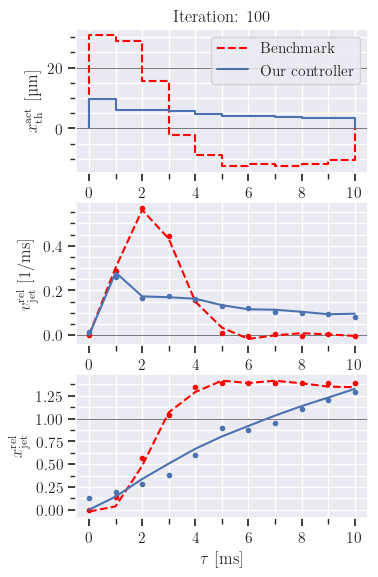

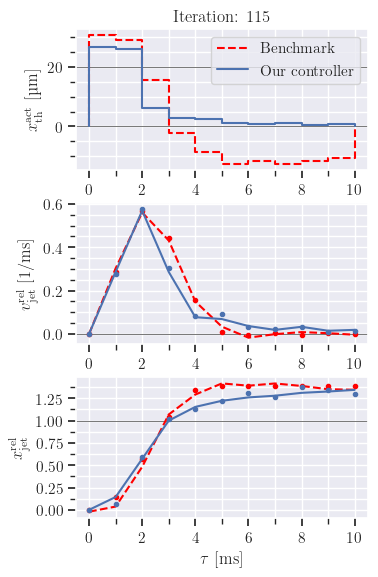

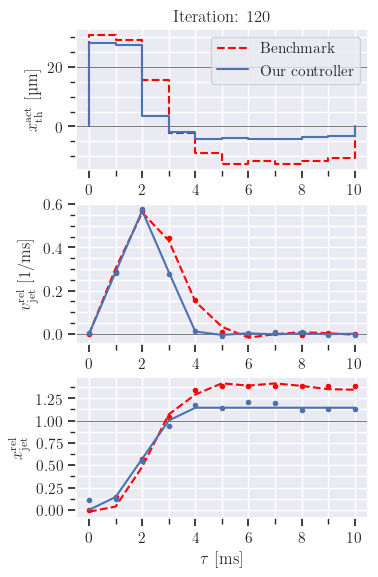

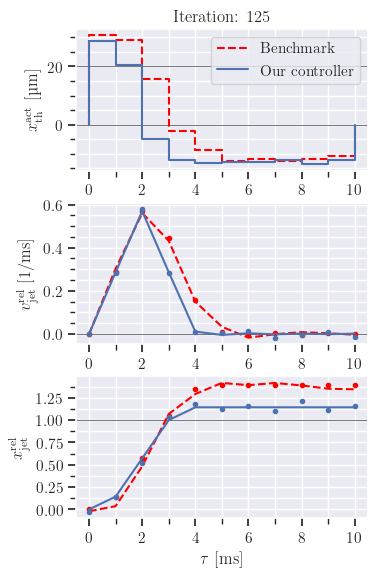

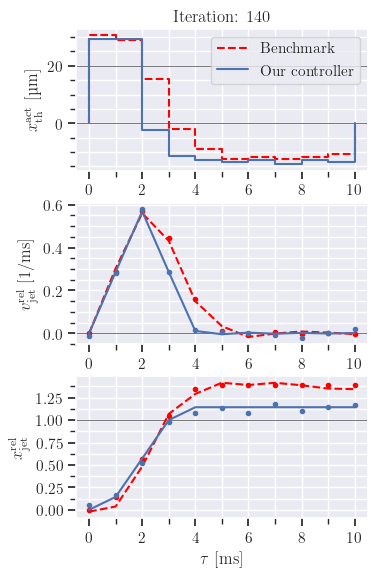

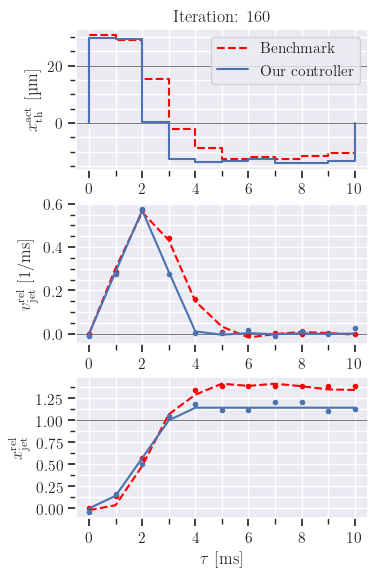

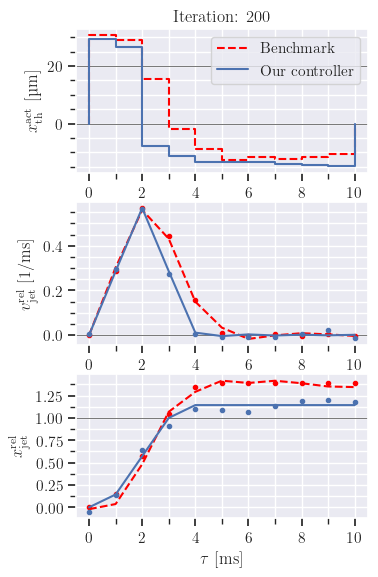

In [35]:
sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "mathptmx",
    "font.size": 14,
})

seeds_colors = {
    '2': 'b',
    # '4': 'g',
    # '5': 'b',
    # '7': 'c',
    # '14': 'orange',
}

P_seeds_colors = {
    '2': 'r',
}

# def plot_iteration_results()
# LOAD IN ONE DATASET
iteration = 120

for iteration in [1, 50, 100, 115, 120, 125, 140, 160, 200]:

    seed_observations = {}
    seed_clean_observations = {}
    seed_actions = {}


    P_clean_obs_df = pd.read_csv(
        pathes_P[list(P_seeds_colors.keys())[0]] / "clean_observations.csv", 
        index_col=0,
    )

    P_obs_df = pd.read_csv(
        pathes_P[list(P_seeds_colors.keys())[0]] / "observations.csv", 
        index_col=0,
    )

    P_act_df = pd.read_csv(
        pathes_P[list(P_seeds_colors.keys())[0]] / "actions.csv", 
        index_col=0,
    )


    for seed in seeds_colors:
        with open(pathes[seed] / "iteration_data.pkl", 'rb') as f:
            data = pickle.load(f)
        
        load_iteration = iteration
        if iteration > len(data):
            load_iteration = len(data)
        
        seed_clean_observations[seed] = data[load_iteration - 1]['clean_observations']
        seed_observations[seed] = data[load_iteration - 1]['observations']
        seed_actions[seed] = [0.]
        seed_actions[seed].extend(data[load_iteration - 1]['actions'][:-1])

    fig, axes = plt.subplots(3, 1, figsize=(4,6),) # gridspec_kw={'height_ratios': [0.8, 1, 1, 1]})
        
    # PLOT ACTIONS
    ax = axes[0]

    ax.axhline(0, color='black', linewidth=0.5, alpha=0.75)
    ax.axhline(20, color='black', linewidth=0.5, alpha=0.75)

    P_act_df.plot('step', 'action', color='red', linestyle='--', ax=ax, label='Benchmark')
    i = 1
    for seed in seeds_colors:
        real_actions = scenario.get_real_actions(seed_actions[seed])
        ax.plot(real_actions[:,0], real_actions[:,1], label='Our controller', color=seeds_colors[seed]) # f'our controller: seed {i}'
        i += 1
        

    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.yaxis.set_minor_locator(MultipleLocator(5))
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
        
    ax.set_ylabel(r"$x^\mathrm{act}_\mathrm{th}$ [µm]")
    ax.set_xlabel("")

    ax.legend(loc='upper right')
    
    ax.set_title(f'Iteration: {iteration}')

    # PLOT JET VELOCITIES
    ax = axes[1]

    ax.axhline(0, color='black', linewidth=0.5, alpha=0.75)


    P_obs_df.iloc[:,1].plot(color='red', linestyle='--', ax=ax)
    P_clean_obs_df.iloc[:,1].plot(marker='.', color='red', linestyle='', ax=ax)

    for seed in seeds_colors:
        ax.plot(seed_clean_observations[seed][:,1], color=seeds_colors[seed])
        ax.plot(seed_observations[seed][:,1], linestyle='', marker='.', color=seeds_colors[seed])
        
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
        
    ax.set_ylabel(r"$v^\mathrm{rel}_\mathrm{jet}~[1/\mathrm{ms}]$")
    ax.set_xlabel("")
        
        # ax.legend().set_visible(False)

    # PLOT JET LENGTHS
    ax = axes[2]

    ax.axhline(1.0, color='black', linewidth=0.5, alpha=0.75)

    P_obs_df.iloc[:,0].plot(color='red', linestyle='--', ax=ax)
    P_clean_obs_df.iloc[:,0].plot(marker='.', color='red', linestyle='', ax=ax)

    for seed in seeds_colors:
        ax.plot(seed_clean_observations[seed][:,0], label=seed, color=seeds_colors[seed])
        ax.plot(seed_observations[seed][:,0], linestyle='', marker='.', color=seeds_colors[seed])

    # for iter, ax in zip(iterations_lt, axes[2,:].flat):
        
    #     ax.axhline(0, color='black', linewidth=0.5, alpha=0.75)
        
    #     sns.lineplot(df, x='time', y=f'jet_velocity_{iter}', color='purple', ax=ax)
        
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(0.25))
    ax.yaxis.set_minor_locator(MultipleLocator(0.125))
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
        
    ax.set_ylabel(r"$x^\mathrm{rel}_\mathrm{jet}$")
    ax.set_xlabel(r"$\tau$ [ms]")

    plt.tight_layout(h_pad=0.1)
# plt.savefig("simulation_results.pdf", dpi=400)